In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11808578010104100334
xla_global_id: -1
]


In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [17]:
# CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

In [18]:
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(x_train[..., np.newaxis], y_train, epochs=50, validation_data=(x_test[..., np.newaxis], y_test))


Epoch 1/50
1875/1875 [==============================] - 24s 12ms/step - loss: 0.4429 - accuracy: 0.8412 - val_loss: 0.3516 - val_accuracy: 0.8736
Epoch 2/50
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2975 - accuracy: 0.8919 - val_loss: 0.2948 - val_accuracy: 0.8922
Epoch 3/50
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2522 - accuracy: 0.9069 - val_loss: 0.2651 - val_accuracy: 0.9030
Epoch 4/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2228 - accuracy: 0.9173 - val_loss: 0.2582 - val_accuracy: 0.9055
Epoch 5/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1975 - accuracy: 0.9271 - val_loss: 0.2562 - val_accuracy: 0.9054
Epoch 6/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1750 - accuracy: 0.9340 - val_loss: 0.2563 - val_accuracy: 0.9063
Epoch 7/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1566 - accuracy: 0.9417 - val_loss: 0.2427 -

In [19]:
# ViT Model
vit_model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


In [20]:
vit_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

vit_history = vit_model.fit(x_train[..., np.newaxis], y_train, epochs=50, validation_data=(x_test[..., np.newaxis], y_test))

Epoch 1/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.8654 - accuracy: 0.6852 - val_loss: 0.5959 - val_accuracy: 0.7778
Epoch 2/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5557 - accuracy: 0.7934 - val_loss: 0.5094 - val_accuracy: 0.8068
Epoch 3/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4973 - accuracy: 0.8192 - val_loss: 0.4756 - val_accuracy: 0.8245
Epoch 4/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4647 - accuracy: 0.8308 - val_loss: 0.4461 - val_accuracy: 0.8381
Epoch 5/50
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4415 - accuracy: 0.8397 - val_loss: 0.4349 - val_accuracy: 0.8399
Epoch 6/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.4243 - accuracy: 0.8449 - val_loss: 0.4170 - val_accuracy: 0.8451
Epoch 7/50
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4112 - accuracy: 0.8498 - val_loss: 0.3939 -

In [21]:
# Evaluating both CNN and ViT

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test[..., np.newaxis], y_test, verbose=2)
vit_test_loss, vit_test_acc = vit_model.evaluate(x_test[..., np.newaxis], y_test, verbose=2)

313/313 - 2s - loss: 0.8666 - accuracy: 0.9132 - 2s/epoch - 6ms/step
313/313 - 2s - loss: 0.2633 - accuracy: 0.9060 - 2s/epoch - 6ms/step


In [22]:
# Metrics

print("CNN Test Accuracy:", cnn_test_acc)
print("ViT Test Accuracy:", vit_test_acc)

cnn_predictions = cnn_model.predict(x_test[..., np.newaxis])
vit_predictions = vit_model.predict(x_test[..., np.newaxis])

cnn_pred_labels = np.argmax(cnn_predictions, axis=1)
vit_pred_labels = np.argmax(vit_predictions, axis=1)

cnn_classification_report = classification_report(y_test, cnn_pred_labels)
vit_classification_report = classification_report(y_test, vit_pred_labels)

print("CNN Classification Report:\n", cnn_classification_report)
print("ViT Classification Report:\n", vit_classification_report)

CNN Test Accuracy: 0.9132000207901001
ViT Test Accuracy: 0.906000018119812
313/313 [==============================] - 2s 6ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.88      0.86      1000
           3       0.93      0.92      0.92      1000
           4       0.84      0.87      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.69      0.74      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

ViT Classification Report:
               precision    recall  f1-score   support



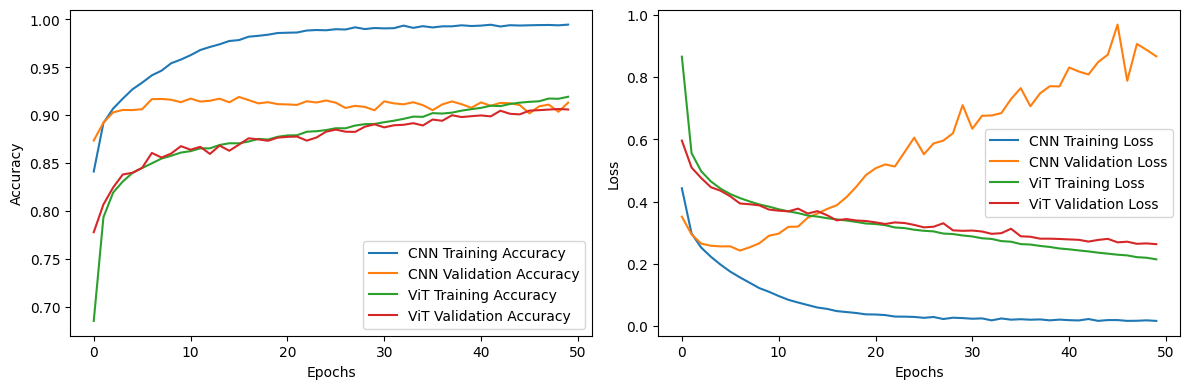

In [23]:
# Plotting

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(vit_history.history['accuracy'], label='ViT Training Accuracy')
plt.plot(vit_history.history['val_accuracy'], label='ViT Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.plot(vit_history.history['loss'], label='ViT Training Loss')
plt.plot(vit_history.history['val_loss'], label='ViT Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18102155205223588675
xla_global_id: -1
]
